<a href="https://colab.research.google.com/github/yje0515/PythonStudy2025/blob/main/mbc_%EB%A7%88%EC%BC%93%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신러닝 알고리즘은 지도학습과 비지도학습으로 나누어진다.

1. 지도학습: 훈련하기 위한 데이터와 정답이 필요
2. 비지도학습: 정답이 없는 학습 자료가 필요

지도학습에서 데이터와 정답을 코드로 입력해서 전처리를 해야하는데, 이때 데이터를 input 이라는 변수에 넣고 정답을 target이라는 변수에 넣어 진행하겠다.
이 input과 target을 합쳐서 훈련데이터(training Data)라고 한다.

입력으로 사용된 길이와 무게 -> 특성(feature)라고 한다.

대부분 수치자료를 이용해서 판단하고 학습하며 분석할 수 있는 기법을 알아보자.


In [1]:
# mbc 마켓에서는 살아있는 생선을 최초로 판매하려고 합니다
# 고객이 온라인 주문을 하면 가장 빠른 물류센터에서 신선한 생선을 곧바로 배송
# 여기서 문제가 발생!!! -> 생선 포장 직원이 생선의 종류를 알지 못함!!!
# IP 카메라를 이용해서 수족관을 실시간 촬영을 하고 이것을 객체추적기술로 활용하면 어떨까?

# 현재는 AI기술을 배우는 단계이므로 사이즈를 이용해서 AI에게 학습을 시켜보자

# 일단 도미와 빙어부터 시작한다. (2개의 객체를 찾도록 훈련 -> 머신러닝(정답이 정해져있음))

# 전처리 데이터
# 도미 생선의 길이 : bream_length 도미용 길이 리스트
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# 도미 생선의 무게 : bream_weigh 도미용 무게 리스트
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

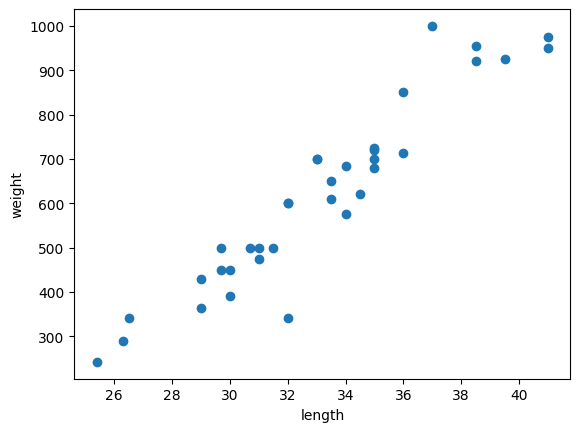

In [3]:
# 특성(feature) : 데이터의 특징(수치자료, 이미지자료, 배열자료 등...)
# 첫번째 도미의 특성 : 길이(25.4cm), 무게(242.0g)
# 두번째 도미의 특성 : 길이(26.3cm), 무게(290.0g)

# 두 특성을 숫자로 보는 것보다 그래프로 표현하면 데이터를 잘 이해할 수 있다.
# 길이 : X축 / 무게 : Y축 -> 산점도 (두 좌표의 관계)

# 파이썬 외부 라이브러리를 이용한 차트표시용 코드
import matplotlib.pyplot as plt
# 과학 계산용으로 그래프를 그리는 대표적인 패키지 : matplotlib # https://wikidocs.net/92071

# plt.scatter(25.4, 242.0)
# plt.scatter(26.3, 290.0)
# plt.show()

# 가로길이 배열과 무게배열을 차트로 만듦
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 보고서를 작성한다.
# 도미 35마리를 2차원 그래프에 점으로 나타내 보았다.
# 결론 : 생선의 길이가 길수록 무게가 많이 나간다 -> 선형적

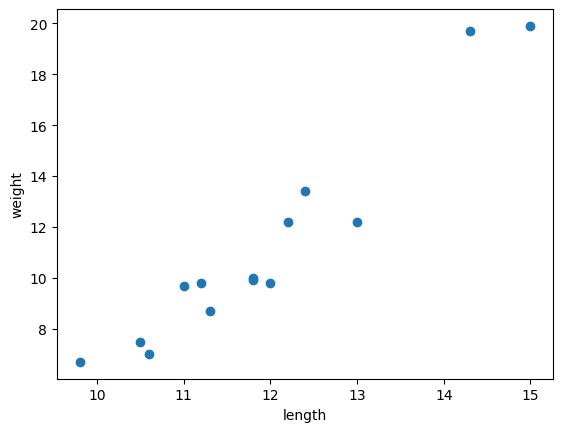

In [7]:
# 빙어 데이터 14개 준비
# 빙어 생선의 길이 : smelt_length 빙어용 길이 리스트
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 빙어 생선의 무게 : smelt_weight 빙어용 무게 리스트
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
plt.scatter(smelt_length,smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
# 지금까지 리스트에 나누어져 있던 배열을 AI 학습용으로 재배치를 한다.
length = bream_length+smelt_length # 도미의 길이 + 빙어의 길이
weight = bream_weight+smelt_weight # 도미의 무게 + 빙어의 무게
print(length)
print(weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [10]:
# zip() 나열된 리스트 각각에서 하나씩 원소를 꺼내어 반환
fish_data = [[l,w] for l,w in zip(length,weight)]
# length, weight를 2차원 리스트로 만듬
print(fish_data) # 2차원 리스트 출력

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [11]:
# 머신러닝은 정답을 target이라는 값으로 알려줘야한다.
# target 0(빙어) 1(도미)을 처리하려함

# 생선 49개에 대한 정답리스트를 만들어야함
# 머신러닝에서는 정답 데이터를 2진분류로 테스트해볼까 한다~! (1:도미, 0:빙어)

fish_target = [1]*35+[0]*14 # 도미 35마리, 빙어 14마리 정답을 리스트로 만들어줌
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
# 지금까지 전처리 데이터를 만들었다면 AI의 기초가 되는 사이킷런을 활용하여 트레이닝을 시켜보자!
# 파이참에는 사이킷런이 설치되어있지 않다, 설치 후 실습해보자
# 코랩은 AI용 외부 라이브러리 일부가 내장되어있음
from sklearn.neighbors import KNeighborsClassifier # 사이킷런 패키지 안. 이웃패키지
                                                    # k-최근접 이웃 분류 알고리즘  분류/회귀 중 분류 알고리즘
kn = KNeighborsClassifier() # import된 객체를 생성하여 변수에 연결, 자바에서 new 한 것과 같음
# kn. 하면 k- 최근접 알고리즘을 사용한다

In [16]:
# 객체를 호출하였으면 전처리 데이터를 삽입한다
#fish_data,fish_target을 전달하여 도미를찾기위한 기준을 학습(.fit)시킨다.
# (트레이닝데이터 : 훈련정답에디터)
kn.fit(fish_data,fish_target) # 훈련 끝

KNeighborsClassifier()

In [17]:
# 훈련 결과 평가 score()
kn.score(fish_data,fish_target) # 1.0 -> 100% 정확도
# 훈련시 전처리 데이터가 얼마되지않아 100%가 나옴(과대적합) -> 85% ~ 90% 가 정상

1.0

In [ ]:
# K-최근접 이웃 분류 알고리즘 파악해보기
# 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 출력
# 주변 다섯개(기본값)의 값을 비교?


In [19]:
kn.predict([[30,600]]) # 새로운 데이터의 정답을 예측(2진분류)
# 1 -> 도미

array([1])

In [20]:
kn.predict([[8,10]]) # 새로운 데이터의 정답을 예측(2진분류)
# 0 -> 빙어

array([0])

In [22]:
# K-최근접 이웃 알고리즘을 위해 준비해야 할 일은 데이터를 모두 가지고 있는게 전부!!
# 새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지 살피기만 함
# 단점 : 데이터가 아주~ 많은 경우 사용하기 좀 어렵다 # AutoRun은 또 머지
# (데이터가 크기 때문에 메모리가 많이 필요, 직선거리 계산 시간도 오래걸림)
# 객체를 메모리에 만들고 활용한다.
# 일회용 학습?
print(kn._fit_X) # 훈련된 데이터

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [23]:
print(kn._fit_method)

kd_tree


In [24]:
# 정답파일
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
# 결론 K-최근접 이웃 알고리즘은 훈련 결과 파일이 존재하지 않는다.
# 새로운 데이터가 들어오면 가장 가까운 데이터를 메모리에서 참고하여 구분함
kn.predict([[5,15]])

array([0])

In [27]:
# 객체 생성시 n_neighbors=??? 참고할 이웃 데이터 수 기본값은 5
# 이웃 객체를 5개 찾아서 결론을 낸다.

# 만약 5개가 아닌 다른 값으로 변경하여 데이터를 훈련하고 싶으면?
kn49 = KNeighborsClassifier(n_neighbors=49) # 참고 데이터를 49개로 한 모델 kn49
# 원본타켓, 원본데이터가 49개인데 가장 가까운 데이터 49개를 사용함
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target) # 훈련결과 71%로 성능이 좋지 않음

0.7142857142857143

In [30]:
# n_neighbors= 값을 변경해 가면서 최적의 정답을 찾는 것이 머신러닝 훈련개발자의 목표

kn49.predict([[2,20]]) # 빙어(0)인데 도미(1)이라고 결과가 나옴

array([1])